# LENDING CLUB CASE STUDY

**Problem Statement**

A consumer finance company which specialises in lending various types of loans to urban customers, has to make a decision for loan approval based on the applicant’s profile. The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. And based on these factors, we need to identify the risky loan applicants, thereby cutting down the amount of credit loss considerably.

## Data Cleaning

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # if there are any warning due to version mismatch, it will be ignored

In [2]:
pd.set_option('display.max_rows', 130, 'display.max_columns', 120)
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
# reading the file in a dataframe and checking the first five values
loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# checking shape of the dataframe
loan_df.shape

(39717, 111)

# Data Cleaning Activities

- Fix Missing values
- Fixing rows and columns
- Standardise values
- Fix invalid values
- Filter data  

In [5]:
# checking null rows
for i in range(len(loan_df.index)) :
    row = loan_df.iloc[i].isnull().sum()
    if (row == 0) :
        print(i)

No index is printed, so we conclude that there is no empty rows

In [6]:
# checking for duplicate rows
loan_df.drop_duplicates(inplace = True)
loan_df.shape

(39717, 111)

We, observed that there are no duplicate rows since the shape remains the same

In [7]:
# checking for missing column names. A zero value tells that no column name is missing
loan_df.columns.isna().sum()

0

In [8]:
# Checking the percentage of null values in each column
(loan_df.isna().sum().sum()/(loan_df.shape[0]*loan_df.shape[1]))*100

51.33989643393677

We can find that almost 52% of the dataframe is null

In [9]:
#Checking for percentage of null or missing values in the data frame
check_missing_perc = 100*(loan_df.isnull().sum()/len(loan_df.index))
#Checking all columns which are having greater than 50% missing values
check_missing_perc[ check_missing_perc > 50 ]

mths_since_last_delinq            64.66
mths_since_last_record            92.99
next_pymnt_d                      97.13
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00
acc_open_past_24mths             100.00


- We can observe that there are a lots of columns with greater then 50% null values 
- As these columns would not give us any useful insights. so, its better to drop these.

In [10]:
#Dropping columns which are having greater than 50% null values
loan_df.drop(check_missing_perc[ check_missing_perc > 50 ].index, axis=1, inplace=True)

In [11]:
# checking for shape again after dropping null value columns 
loan_df.shape

(39717, 54)

In [12]:
# checking the values in desc column
loan_df.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

- Looks like , we will need NLP to process desc column. It's neither categorical nor quantitaive so dropping this column as would not help in analysis

In [13]:
#dropping the desc column
loan_df.drop(columns=['desc'], inplace=True)
loan_df.shape

(39717, 53)

## Checking unique values

In [14]:
#Find number of unique values in each column
temp_unique = loan_df.nunique().sort_values()
print(temp_unique)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

- We can observe that few columns here have only one unique value in all the rows
    - 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' 
- As these columns would not give us any useful insights. so, its better to drop these.

In [15]:
#Get all the columns where we have uniques values equals to 1.
temp_unique_index = temp_unique[temp_unique.values == 1].index
print(temp_unique_index)

Index(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',
       'acc_now_delinq', 'application_type', 'policy_code',
       'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'],
      dtype='object')


In [16]:
#Drop columns with only one values.
loan_df_drp_nunique = loan_df.drop(columns = list(temp_unique_index), axis=1)
#check shape after dropping temp_unique.values == 1
loan_df_drp_nunique.shape

(39717, 44)

- In unique values response, we can see url, and member_id having all unique values for each entry.
 - We can keep Id as unique key
 - we have partial data in zip_code, therefore it is of no use and may impact analysis negatively
 - emp_title, and title columns are having only text values and that too mostly are unique.
 - Let's drop these columns also.

In [17]:
loan_df_drp_nunique.drop(['url', 'member_id', 'zip_code', 'emp_title', 'title'], axis=1, inplace=True)
#check shape after dropping columns
loan_df_drp_nunique.shape

(39717, 39)

- Per domain experts, out of remaining columns below are the list of columns useful only after loan application is approved
    - revol_bal, delinq_2yrs, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt,last_credit_pull_d, total_pymnt
    - total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, out_prncp, out_prncp_inv
- As company is only interested to know which loan is risky.
- Lets drop these as well

In [18]:
post_loan_approved_columns = ['revol_bal', 'delinq_2yrs', 'collection_recovery_fee', 'last_pymnt_d','last_credit_pull_d', 
                              'last_pymnt_amnt', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                              'recoveries', 'out_prncp', 'out_prncp_inv']


In [19]:
loan_df_drp_post_loan_approved_columns = loan_df_drp_nunique.drop(post_loan_approved_columns, axis=1)

In [20]:
loan_df_drp_post_loan_approved_columns.shape

(39717, 26)

In [21]:
loan_df_drp_post_loan_approved_columns.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
0,1077501,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,"5,833.84",0.00
1,1077430,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4,"1,008.71",0.00
2,1077175,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,"3,005.67",0.00
3,1076863,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37,"12,231.89",0.00
4,1075358,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38,"3,513.33",0.00


In [22]:
#check again the percentage of null or missing values
missing_percent = 100*(loan_df_drp_post_loan_approved_columns.isnull().sum()/len(loan_df_drp_post_loan_approved_columns.index))
missing_percent[ missing_percent > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

- Dropping rows which have null emp_length. Since, it's an ordered categorical variable, fixing it with median or any other
- value will skew the plots. Hence, dropping it
- Dropping rows against null values for revol_util and pub_rec_bankruptcies too

In [23]:
final_loan_df = loan_df_drp_post_loan_approved_columns.dropna(subset=['emp_length','revol_util', 'pub_rec_bankruptcies'])


In [24]:
#check again the percentage of null or missing values
missing_percent = round(100*(final_loan_df.isnull().sum()/len(final_loan_df.index)), 2)
missing_percent[ missing_percent > 0 ]

Series([], dtype: float64)

In [25]:
# checking final dataframe shape
final_loan_df.shape

(37898, 26)

In [26]:
#Analyse remaining columns
final_loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'total_pymnt_inv',
       'pub_rec_bankruptcies'],
      dtype='object')

### FIXING COLUMNS--

In [27]:
# fixing emp_length column by removing '+', 'years' and '< 1' as zero years
final_loan_df.emp_length = final_loan_df.emp_length.apply( lambda x : x.replace('+',''))
final_loan_df.emp_length = final_loan_df.emp_length.apply( lambda x : x.strip('years'))
final_loan_df.emp_length = final_loan_df.emp_length.apply( lambda x : x.replace('< 1','0'))
final_loan_df.emp_length = final_loan_df.emp_length.astype(int)

In [28]:
final_loan_df.rename(columns = {'emp_length':'emp_length_years'}, inplace = True)
final_loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
0,1077501,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,"5,833.84",0.00
1,1077430,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,0,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4,"1,008.71",0.00
2,1077175,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,"3,005.67",0.00
3,1076863,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37,"12,231.89",0.00
4,1075358,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38,"3,513.33",0.00


In [29]:
# Removing % sign from int_rate and casting it as type float
final_loan_df.int_rate = final_loan_df.int_rate.str.replace('%', '').astype(float)
final_loan_df.rename(columns = {'int_rate':'int_rate_percentage'}, inplace = True)


In [30]:
# Removing % sign from revol_util and casting it as type float
final_loan_df.revol_util = final_loan_df.revol_util.str.replace('%', '').astype(float)
final_loan_df.rename(columns = {'revol_util':'revol_util_percentage'}, inplace = True)


### REMOVING UNIMPORTANT ROWS--

In [31]:
# check for status values in loan_status
final_loan_df['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

In [32]:
# removing rows for 'Current' loan status as it is not needed for analysis
final_loan_df = final_loan_df[loan_df.loan_status != 'Current']
final_loan_df.shape

(36800, 26)

In [33]:
final_loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [34]:
final_loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percentage,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percentage,total_acc,total_pymnt_inv,pub_rec_bankruptcies
0,1077501,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70,9,"5,833.84",0.00
1,1077430,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40,4,"1,008.71",0.00
2,1077175,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50,10,"3,005.67",0.00
3,1076863,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.00,37,"12,231.89",0.00
5,1075269,5000,5000,"5,000.00",36 months,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.30,12,"5,632.21",0.00


In [35]:
# checking all the columns in a for loop 
for col in final_loan_df.columns :
    print(final_loan_df[col].value_counts())
    print('\n----------------------\n')

1077501    1
567276     1
566028     1
564259     1
566855     1
          ..
777271     1
777296     1
777293     1
773002     1
112496     1
Name: id, Length: 36800, dtype: int64

----------------------

10000    2670
12000    2178
5000     1910
6000     1806
15000    1768
         ... 
3925        1
11375       1
18325       1
9650        1
23575       1
Name: loan_amnt, Length: 855, dtype: int64

----------------------

10000    2583
12000    2093
5000     1899
6000     1795
15000    1665
         ... 
20350       1
21875       1
1650        1
16375       1
725         1
Name: funded_amnt, Length: 1009, dtype: int64

----------------------

5,000.00     1237
10,000.00    1224
6,000.00     1143
12,000.00    1001
8,000.00      856
             ... 
15,443.71       1
14,821.48       1
7,968.88        1
14,938.69       1
525.00          1
Name: funded_amnt_inv, Length: 7596, dtype: int64

----------------------

 36 months    27546
 60 months     9254
Name: term, dtype: int64

--------

### Standardizing column values

In [36]:
final_loan_df.funded_amnt_inv = final_loan_df.funded_amnt_inv.round(2)

### CREATING DERIVED COLUMNS

In [37]:
final_loan_df.issue_d = pd.to_datetime(final_loan_df.issue_d, format='%b-%y')
final_loan_df['issue_d_year'] = pd.DatetimeIndex(final_loan_df['issue_d']).year
final_loan_df['issue_d_month'] = pd.DatetimeIndex(final_loan_df['issue_d']).month

In [38]:
# checking for discrepancy in grade and sub-grade columns
final_loan_df[final_loan_df.grade != final_loan_df.sub_grade.str[0]]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percentage,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percentage,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_d_year,issue_d_month


All sub-grades are aligned to grades

In [39]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     36800 non-null  int64         
 1   loan_amnt              36800 non-null  int64         
 2   funded_amnt            36800 non-null  int64         
 3   funded_amnt_inv        36800 non-null  float64       
 4   term                   36800 non-null  object        
 5   int_rate_percentage    36800 non-null  float64       
 6   installment            36800 non-null  float64       
 7   grade                  36800 non-null  object        
 8   sub_grade              36800 non-null  object        
 9   emp_length_years       36800 non-null  int64         
 10  home_ownership         36800 non-null  object        
 11  annual_inc             36800 non-null  float64       
 12  verification_status    36800 non-null  object        
 13  i

## Univariate Analysis - Quantitative Variable

In [40]:
# Continuous Variable
final_loan_df[['loan_amnt', 'annual_inc', 'int_rate_percentage', 'installment','dti' ]].describe()

,loan_amnt,annual_inc,int_rate_percentage,installment,dti
count,"36,800.00","36,800.00","36,800.00","36,800.00","36,800.00"
mean,"11,149.54","69,434.48",11.98,324.91,13.33
std,"7,369.86","64,021.59",3.70,208.89,6.65
min,500.00,"4,000.00",5.42,16.08,0.00
25%,"5,500.00","41,133.00",8.94,167.73,8.22
50%,"10,000.00","60,000.00",11.83,280.11,13.43
75%,"15,000.00","83,000.00",14.46,429.37,18.59
max,"35,000.00","6,000,000.00",24.40,"1,305.19",29.99


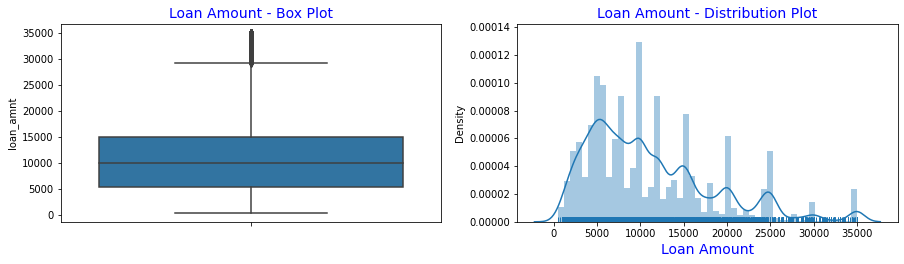

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = final_loan_df.loan_amnt)
ax.set_title('Loan Amount - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(final_loan_df.loan_amnt, rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
plt.show()

**OBSERVATION - Most of the loans are between 5000 to 10000 range**

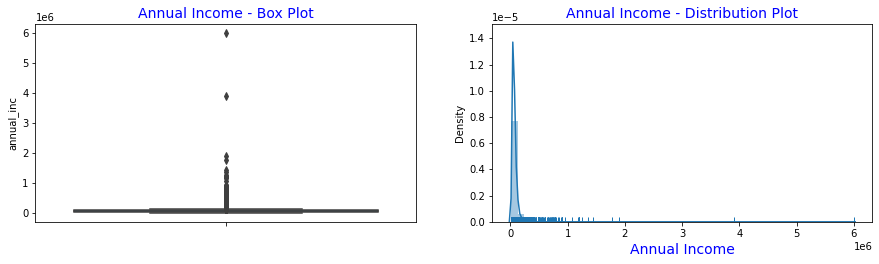

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = final_loan_df.annual_inc)
ax.set_title('Annual Income - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(final_loan_df.annual_inc, rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()
# the below plot doesn't look good. So let's take 98 percentile values

##### Outlier Treatment

(39717, 53)
(36064, 28)


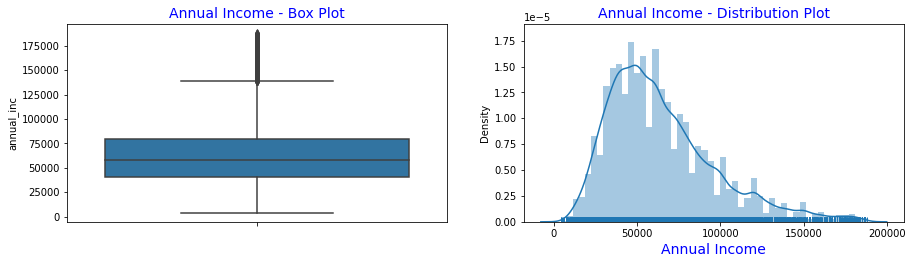

In [43]:
# outlier treatment for annual income

print(loan_df.shape)
final_loan_df = final_loan_df[final_loan_df['annual_inc'] < np.percentile(final_loan_df['annual_inc'], 98)]
print(final_loan_df.shape)

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = final_loan_df.annual_inc)
ax.set_title('Annual Income - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(final_loan_df.annual_inc, rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

**OBSERVATION- Most of the loan applicants have an annual income in the range of 40K to 80K**

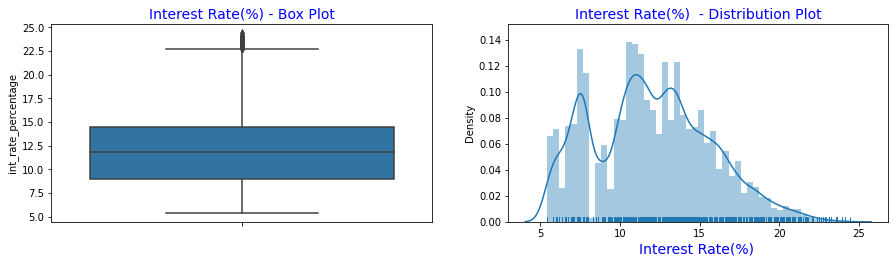

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = final_loan_df.int_rate_percentage)
ax.set_title('Interest Rate(%) - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(final_loan_df.int_rate_percentage, rug = True)
ax.set_title('Interest Rate(%)  - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Interest Rate(%) ',fontsize=14,color='b')
plt.show()

**OBSERVATION-**

   - **We can Observe based on above analysis that most of the interest rates lies between 9% to 14.5%.**
   - **A few borrower took loan at higher rates of interest greater than 22.5%**

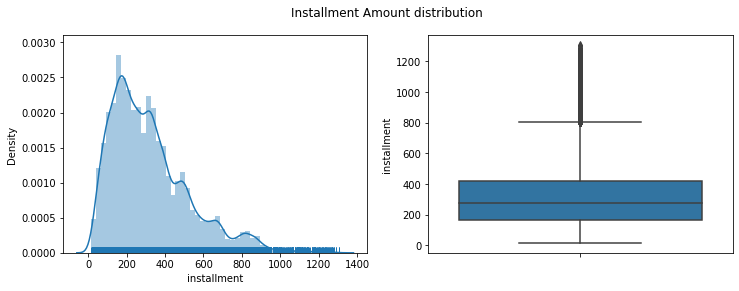

count   36,064.00
mean       320.04
std        204.23
min         16.08
5%          72.29
10%         99.97
25%        166.50
50%        277.16
75%        421.44
90%        609.67
95%        737.06
max      1,305.19
Name: installment, dtype: float64

In [45]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(12,4))

#Histogram plot for installment
plt.subplot(1,2,1) #Configure subplot index
sns.distplot(final_loan_df.installment, rug=True)

#Box plot plot for installment
plt.subplot(1,2,2) #Configure subplot index
sns.boxplot(y=final_loan_df.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

final_loan_df.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95])

**OBSERVATION -We can observe based on above analysis that most of the installments lies between 168 to 429.**

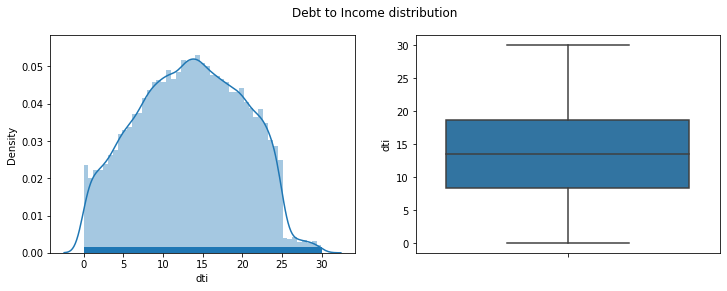

count   36,064.00
mean        13.43
std          6.63
min          0.00
5%           2.28
10%          4.23
25%          8.34
50%         13.54
75%         18.66
90%         22.37
max         29.99
Name: dti, dtype: float64

In [46]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(12,4))

#Histogram plot for dti
plt.subplot(1,2,1) #Configure subplot index
sns.distplot(final_loan_df.dti, rug=True)

#Box plot plot for dti
plt.subplot(1,2,2) #Configure subplot index
sns.boxplot(y=final_loan_df.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

final_loan_df.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9])

**OBSERVATIONS-**

- **There are no outliers as mean and median almost similar and all data falls with in the limits.**
- **The dti data distribution is almost similar to normal distribution.**
- **This is good indicator as barrowers are having Debt to Income ratio less than 30.**

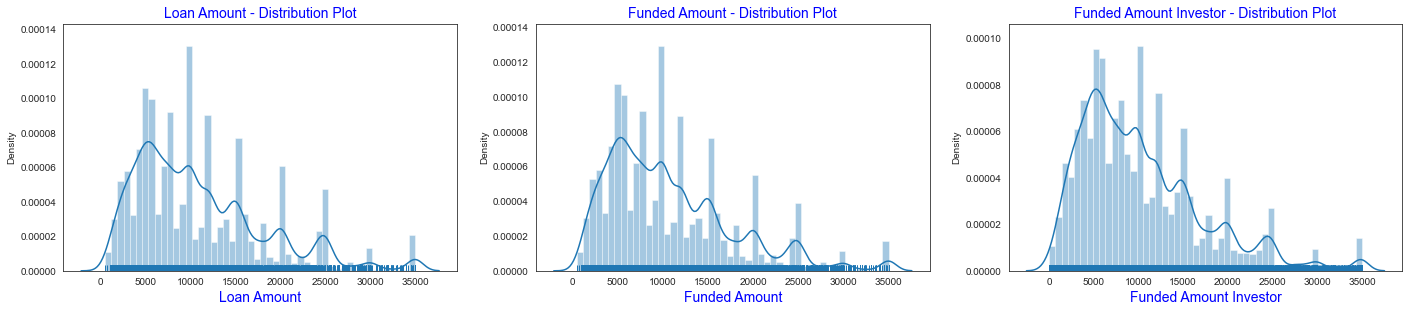

In [47]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(24,10))
sns.set_style("white")
# Loan Amount subplot
plt.subplot(2, 3, 1)
ax = sns.distplot(final_loan_df.loan_amnt,rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
#  Funded Amount subplot
plt.subplot(2, 3, 2)
ax = sns.distplot(final_loan_df.funded_amnt,rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount',fontsize=14,color='b')
# Funded Amount Investor subplot 
plt.subplot(2, 3, 3)
ax = sns.distplot(final_loan_df.funded_amnt_inv,rug = True)
ax.set_title('Funded Amount Investor - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Investor',fontsize=14,color='b')
plt.show()


**OBSERVATION -**
- **The loan amount varies from 0 to 35,000 having median of 10,000 and mean of around 11,150.**
- **The funded_amnt_inv varies from 0 to 35,000 having median of 9,000 and mean of around 10,440.**
- **The funded_amnt is left skewed. Most of the loan amount given is 5 lakhs**
- **'loan_amnt' and 'funded_amnt_inv' distribution looks almost similar, we can reach to a conclusion that the lending club approved atmost all loan appllications.**
- **All three have almost similar distribution, so let's only work with the column 'loan_amnt' and drop the remaining**

In [48]:
final_loan_df.drop(columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)
final_loan_df.shape

(36064, 26)

- Now, the data frame looks in good shape. Lets continue with the analysis

## Univariate Analysis - Categorical

### 1. Unordered Categorical Variable

Lets analyze two very important variable under this loan_status and loan_purpose first

### -  for Loan Status

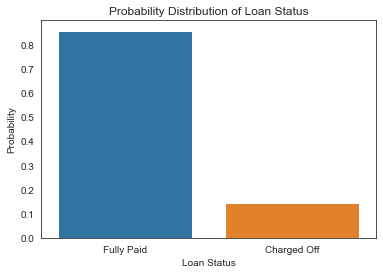

In [49]:
#Bar plot for Loan Status
sns.barplot(x='index', y='loan_status', data=final_loan_df['loan_status'].value_counts(normalize=True).reset_index())
plt.xlabel('Loan Status')
plt.ylabel('Probability')
plt.title('Probability Distribution of Loan Status')
plt.show()


**OBSERVATION - We can see,  85% of loans are fully paid whereas 14% are defaulted.**

### - for Loan Purpose

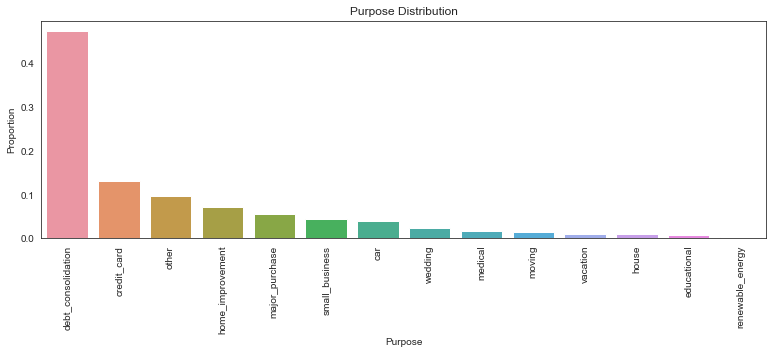

In [50]:
#Bar plot for Purpose
plt.figure(figsize=(13,4))
sns.barplot(x='index', y='purpose', data=final_loan_df['purpose'].value_counts(normalize=True).reset_index())
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

**OBSERVATION**
- **Most of the loans are for the purpose of debt consolidation around 43% followed by credit card around 13%**

In [51]:
final_loan_df.loan_status.value_counts()

Fully Paid     30871
Charged Off     5193
Name: loan_status, dtype: int64

### -for Home Ownership

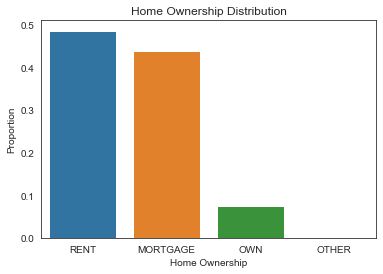

In [52]:
#Bar plot for Home Ownership
sns.barplot(x='index', y='home_ownership', data=final_loan_df['home_ownership'].value_counts(normalize=True).reset_index())
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

**OBSERVATIONS - The lending club approve loans mostly for borrowers having rented and mortgage houses.**

### -for Verification Status

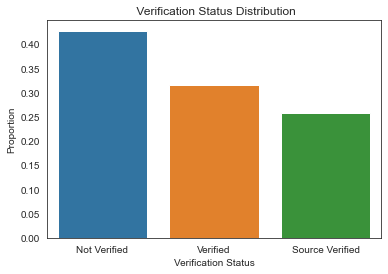

In [53]:
#Bar plot for Verification Status
sns.barplot(x='index', y='verification_status', data=final_loan_df['verification_status'].value_counts(normalize=True).reset_index())
plt.xlabel('Verification Status')
plt.ylabel('Proportion')
plt.title(' Verification Status Distribution')
plt.show()

**OBSERVATIONS- The lending club approve majority of loans without verification of borrowers income.**

### 2. Ordered Categorical Variable



### - for Loan issue date (issue_d)

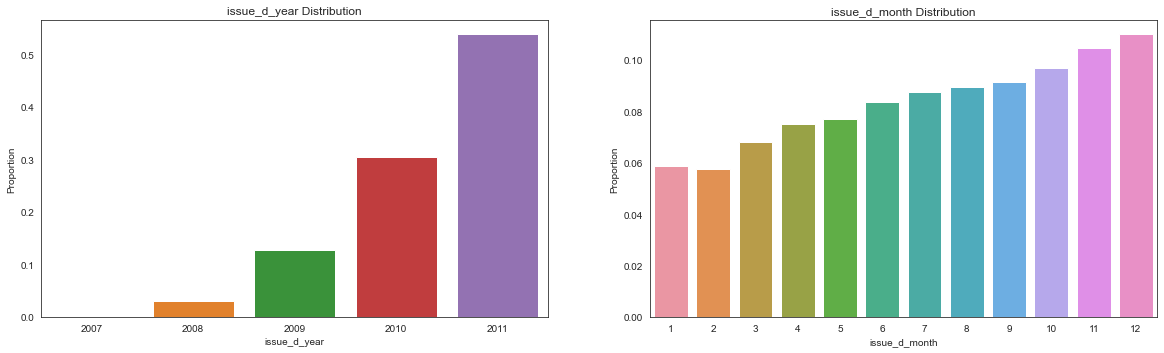

In [54]:
#Adjusting the size of figure to accomodate 3 plots
plt.figure(figsize=(20,12))

#Bar plot for issue_d_year
plt.subplot(2,2,1) #Configure subplot index
sns.barplot(x='index', y='issue_d_year', data=final_loan_df.issue_d_year.value_counts(normalize=True).reset_index())
plt.xlabel('issue_d_year')
plt.ylabel('Proportion')
plt.title('issue_d_year Distribution')

#Bar plot for issue_d_month
plt.subplot(2,2,2) #Configure subplot index
sns.barplot(x='index', y='issue_d_month', data=final_loan_df.issue_d_month.value_counts(normalize=True).reset_index())
plt.xlabel('issue_d_month')
plt.ylabel('Proportion')
plt.title('issue_d_month Distribution')

plt.show()


**OBSERVATIONS-**
- **Every year the lending club almost doubled loan approvals**
- **The lending club approve more loans in last 3 months end of each year(here Oct, Nov and Dec)**

### - for Term

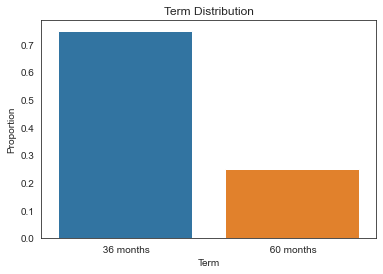

In [55]:
#Bar plot for term
sns.barplot(x='index', y='term', data=final_loan_df['term'].value_counts(normalize=True).reset_index())
plt.xlabel('Term')
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

**OBSERVATIONS- The lending club gives more loans for 36 months tenure than 60 months.**

### -for Grade of loan

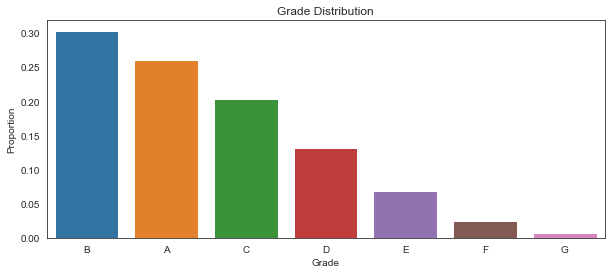

In [56]:
#Bar plot for grade
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='grade', data=final_loan_df['grade'].value_counts(normalize=True).reset_index())
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.title('Grade Distribution')
plt.show()

**OBSERVATIONS- Grade A and B have more borrowers then other grades**

### - for Employment length

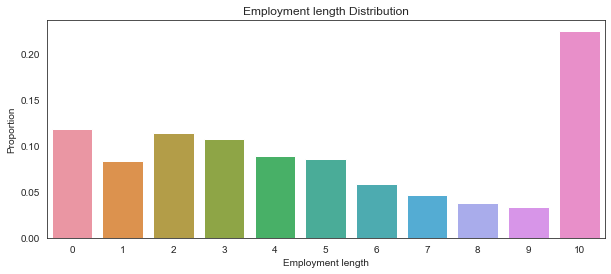

In [57]:
#Bar plot for Employment length
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='emp_length_years', data=final_loan_df['emp_length_years'].value_counts(normalize=True).reset_index())
plt.xlabel('Employment length')
plt.ylabel('Proportion')
plt.title('Employment length Distribution')
plt.show()

**OBSERVATIONS- 10+ years has more borrowers then other employment length**

## Segmented Univariate Analysis

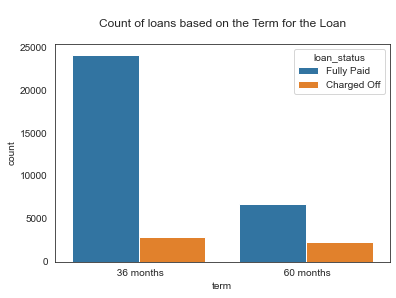

In [58]:
sns.set_style('white')
sns.countplot(x = 'term', data = final_loan_df, hue='loan_status').set(title= '\nCount of loans based on the Term for the Loan\n')
plt.xticks(rotation= 0, ha='center')
plt.show()

**OBSERVATION - More number of loans are applied for 36 months term but the number of charged off for both categories are comparable**

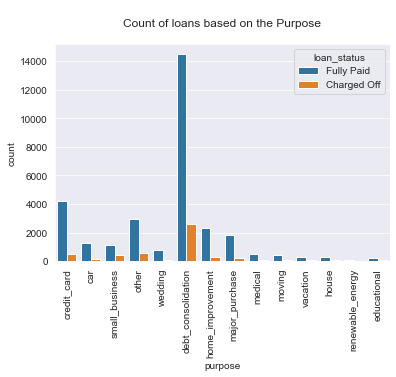

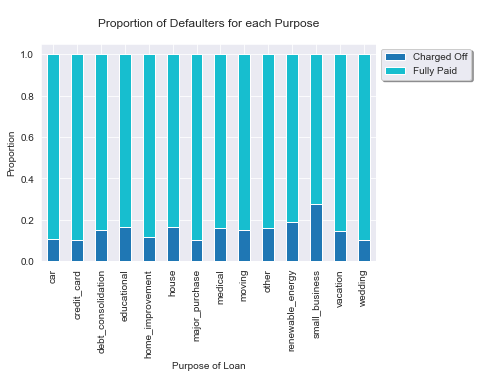

In [59]:
sns.set_style('darkgrid')

ax = sns.countplot(x = 'purpose', data = final_loan_df, hue='loan_status').set(title= '\nCount of loans based on the Purpose\n')
plt.xticks(rotation='vertical', ha='center')



cross_tab_prop = pd.crosstab(index=final_loan_df['purpose'],
                             columns=loan_df['loan_status'],
                             normalize="index")


ax = cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10')

plt.legend(loc="upper left", ncol=2)
ax.set_xlabel("Purpose of Loan")
ax.set_ylabel("Proportion")
ax.set_title('\nProportion of Defaulters for each Purpose\n')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)

plt.show()

**OBSERVATION -**
- **Even though the number of Charged off loans are under debt consideration, percentage-wise the loans taken for the purpose of 'Small Business' are around 23% charged off which is more than for any other purpose. Mostly these must be new business and must not be doing so well later.**

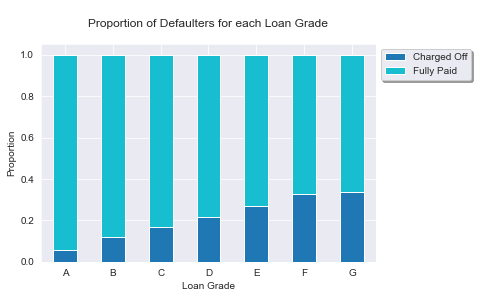

In [60]:
cross_tab_prop = pd.crosstab(index=final_loan_df['grade'],
                             columns=final_loan_df['loan_status'],
                             normalize="index")


ax = cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10')

plt.legend(loc="upper left", ncol=2)
ax.set_xlabel("Loan Grade")
ax.set_ylabel("Proportion")
ax.set_title('\nProportion of Defaulters for each Loan Grade\n')
plt.xticks(rotation= 0, ha='center')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
plt.rcParams["figure.figsize"] = [10, 5]

plt.show()

**OBSERVATION - Percentage wise, grade F and G have more defaulters whereas grade A has the least. So, grade F and G type of loans are more likely to default**

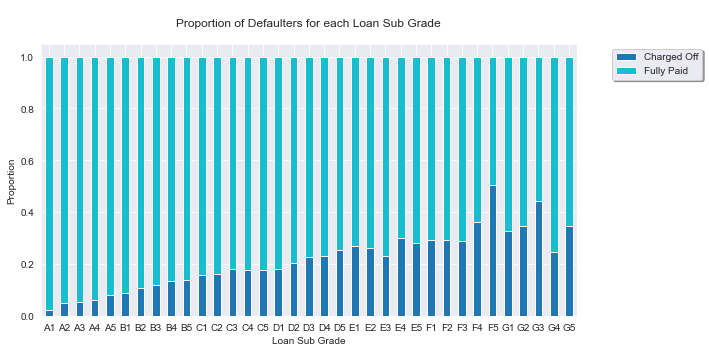

In [61]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
cross_tab_prop = pd.crosstab(index=final_loan_df['sub_grade'],
                             columns=final_loan_df['loan_status'],
                             normalize="index")


ax = cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10')

plt.legend(loc="upper left", ncol=2)
ax.set_xlabel("Loan Sub Grade")
ax.set_ylabel("Proportion")
ax.set_title('\nProportion of Defaulters for each Loan Sub Grade\n')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)

plt.xticks(rotation= 0, ha='center')
plt.show()

**OBSERVATION - Loan of Grade F5 has alomost 50% defaulters**

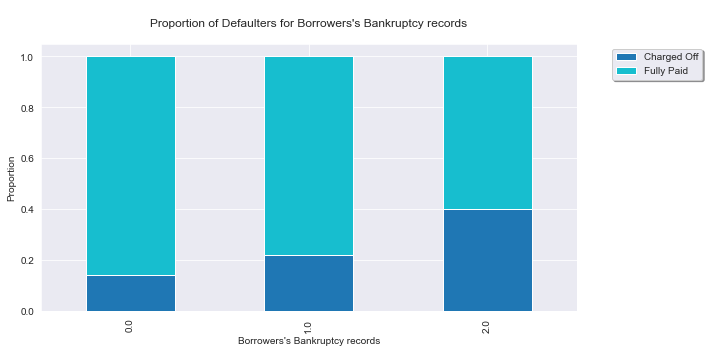

In [62]:
cross_tab_prop = pd.crosstab(index=final_loan_df['pub_rec_bankruptcies'],
                             columns=final_loan_df['loan_status'],
                             normalize="index")


ax = cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10')

plt.legend(loc="upper left", ncol=2)
ax.set_xlabel("Borrowers\'s Bankruptcy records")
ax.set_ylabel("Proportion")
ax.set_title('\nProportion of Defaulters for Borrowers\'s Bankruptcy records\n')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
plt.show()

**OBSERVATION - Clearly, for higher number of Bankruptcy records, ratio of defaulters are high. Borrower's having 2 bankruptcy records are 40 % defaulters**

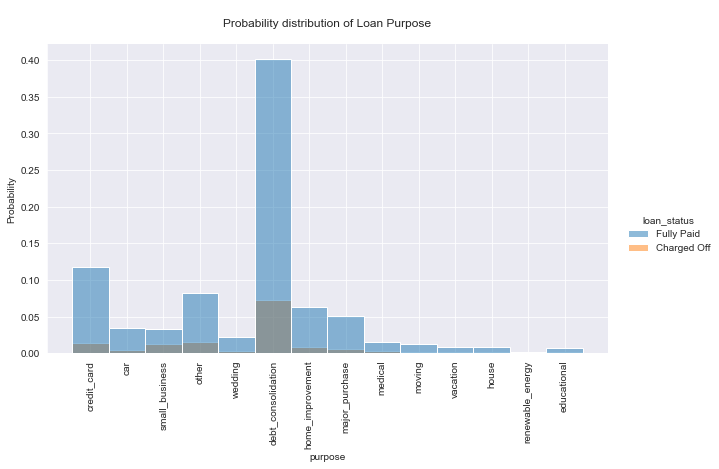

In [63]:
sns.set_style('darkgrid')
sns.displot(x = 'purpose', data = final_loan_df, stat= 'probability', hue='loan_status', color = 'g',aspect=14/8).set(title= '\nProbability distribution of Loan Purpose\n')
plt.xticks(rotation='vertical', ha='center')
plt.show()

**OBSERVATIONS-**

- **Most of the loans are for the purpose of debt consolidation around 43% followed by credit card around 13%**
- **The number of charged-off loans are also higher in category debt consolidation**

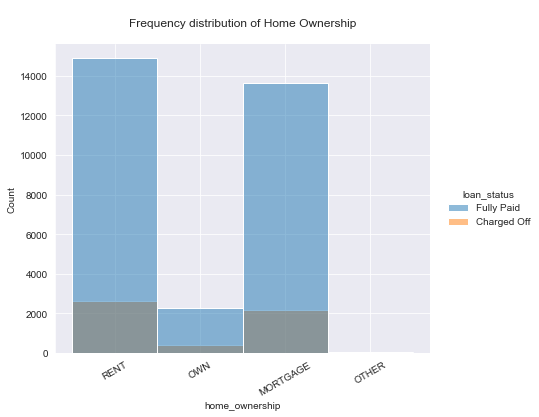

In [64]:
sns.set_style('darkgrid')
sns.displot(x = 'home_ownership', data = final_loan_df, hue='loan_status', color = 'g', aspect=10/8).set(title= '\nFrequency distribution of Home Ownership\n')
plt.xticks(rotation=30 , ha='center')
plt.show()

**OBSERVATION - The loan applicant are mostly the ones who have either rented or mortgaged and so the number of charged-off is also high under these categories**

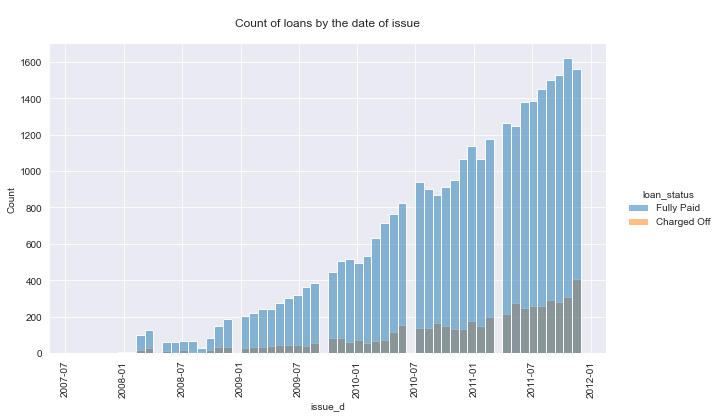

In [65]:
sns.set_style('darkgrid')
sns.displot(x = 'issue_d', data = final_loan_df, hue='loan_status', color = 'g',aspect=14/8).set(title= '\nCount of loans by the date of issue\n')
plt.xticks(rotation='vertical', ha='center')
plt.show()

**OBSERVATION - The number of loans are increasing by every passing year and correspondingly the numbers of charged off applicants as well`**

## Bivariate Analysis

###### Correlation Matrix of Quantitative Variables

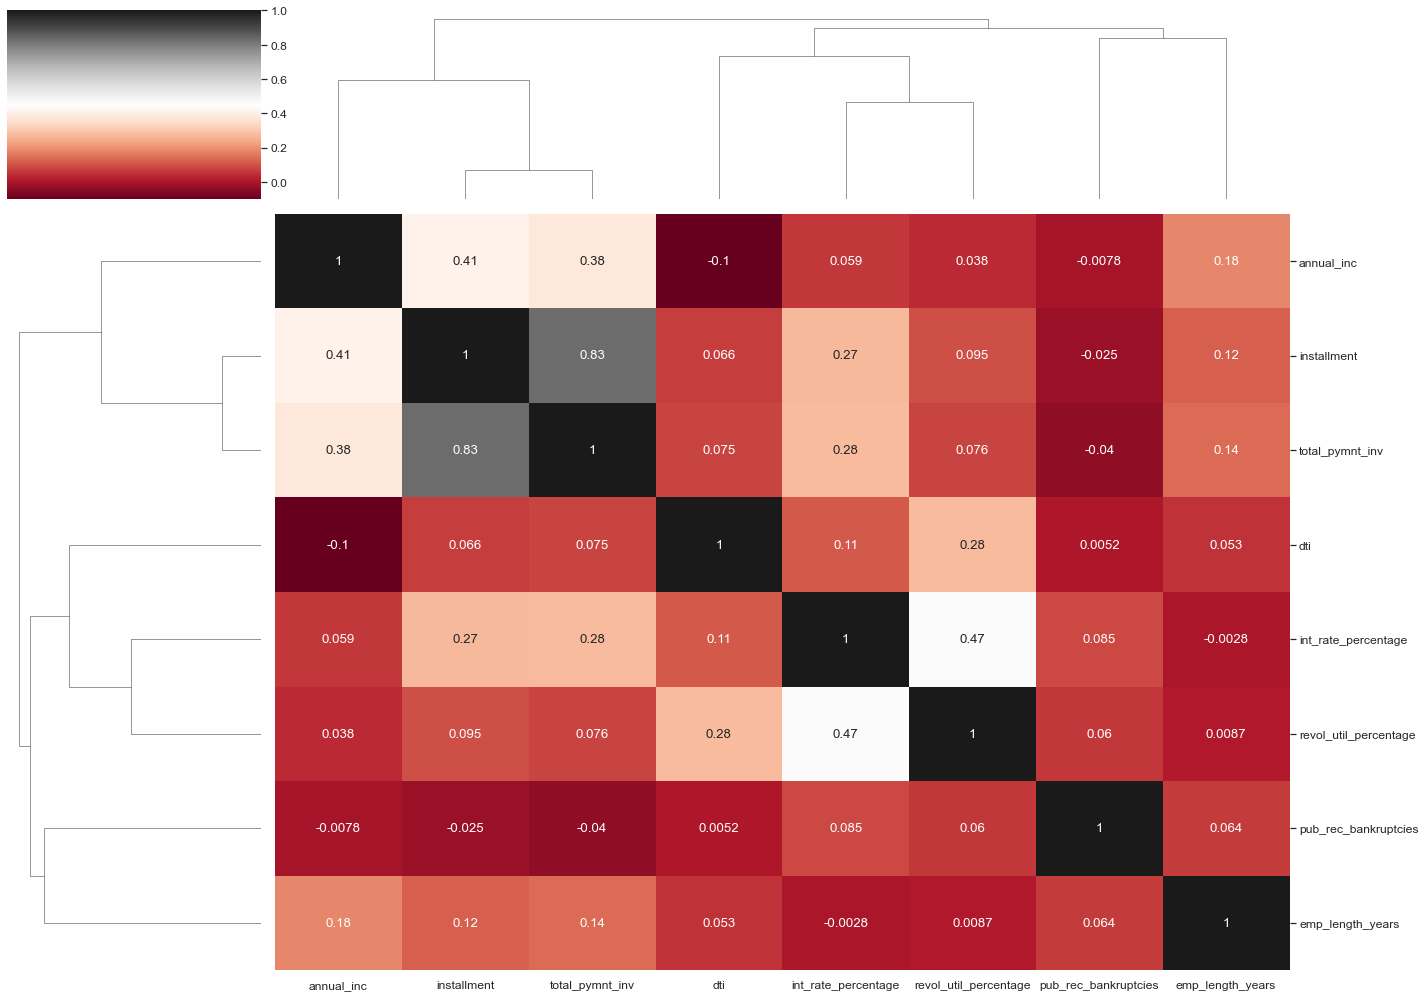

In [66]:
# clubbing continuous or quantitative variable and ordered categorical variable
quantitative_col  = final_loan_df.select_dtypes(float).columns.to_list() + ['emp_length_years', 'issue_d']
loan_df_quantitative = final_loan_df[quantitative_col]

# plotting heat map
loan_correlation = loan_df_quantitative.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(20, 14),cmap="RdGy")
plt.show()

**Observation -**
 - **Annual Income, installment, and total payment are strongly correlated.**
 - **DTI is negatively correlated with annual income. So, the higher the income, the less is dti**
 - **Annual income positively correlated with employment length**
 - **The higher the annual income, the less are the public bankruptcy records**

### Categorical-Categorical Bivariate Analysis

### Term vs Loan Status


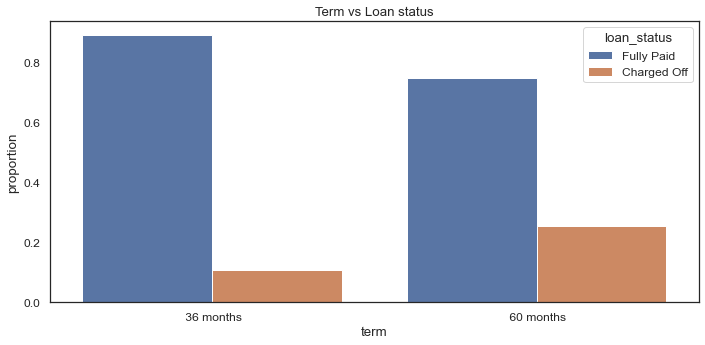

In [67]:
sns.set_style('white')
#Proportion of values for each category
df_term_loan_status = final_loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df_term_loan_status['proportion'] = df_term_loan_status.groupby('term').transform(lambda x: x/x.sum())

#Bar plot for Term vs Loan status, hue as loan status
sns.barplot(x='term', y='proportion', hue='loan_status', data=df_term_loan_status, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')
plt.show()


#### Observations:
- It seems there is more proportion of borrowers have defaulted in 60 months term compare to 36 months. 
- 36 months tenure has higher Fully Paid rate.

### Address State vs Charged-off

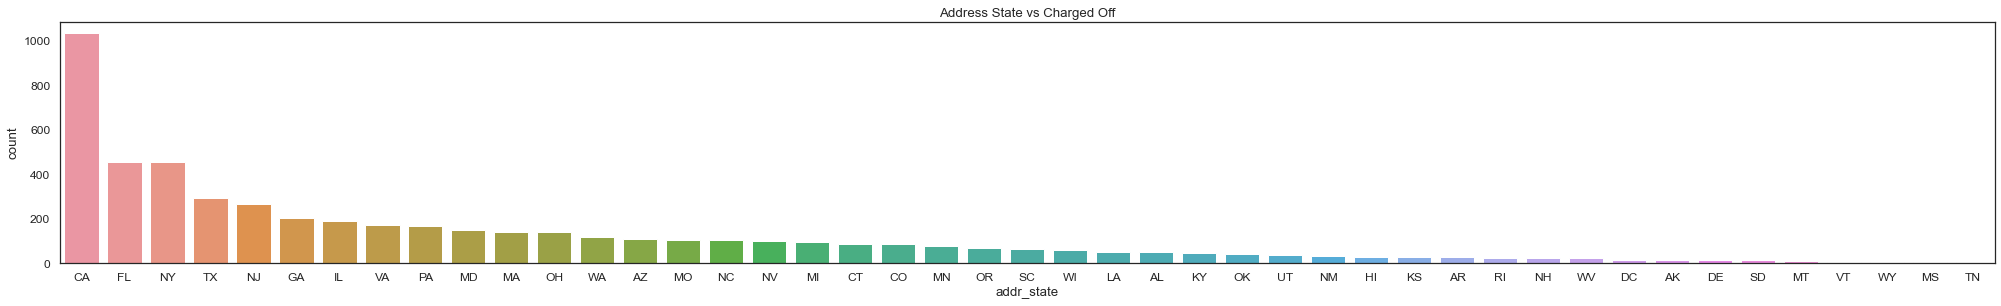

In [68]:
plt.figure(figsize=(28,8))

#countplot for Address State vs Charged Off
plt.subplot(211)
sns.countplot(x='addr_state', data=final_loan_df[final_loan_df.loan_status.values == 'Charged Off'], 
              order=final_loan_df[final_loan_df.loan_status.values == 'Charged Off'].addr_state.value_counts().index)
plt.title('Address State vs Charged Off')
plt.show()

#### Observations:
- CA , FL and NY states have most number of defaulted borrowers.

### Purpose Vs Loan Status

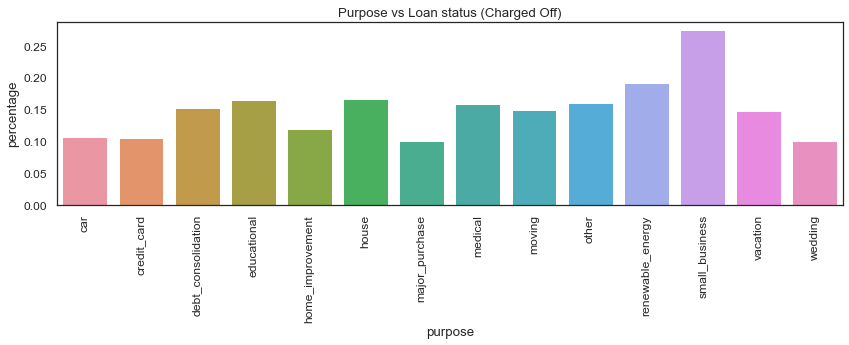

In [69]:
#Proportion of values for each category
df_pur_ls = final_loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df_pur_ls['percentage'] = df_pur_ls.groupby('purpose').transform(lambda x: x/x.sum())
df_pur_ls = df_pur_ls[df_pur_ls.loan_status == 'Charged Off']

#Bar plot for Purpose Vs Loan Status
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df_pur_ls)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

### Observations:
- Small businesses have comparitively higher Charged-off/defaults.

### Categorical-Numerical Bivariate Analysis


### Term vs loan amount 

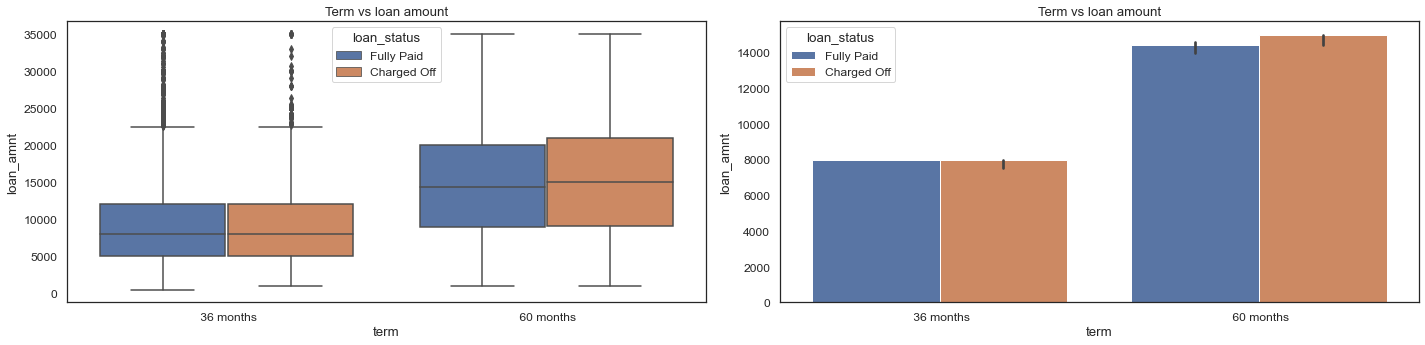

In [70]:
plt.figure(figsize=(20,5))

#Box plot for Term vs Loan amount, hue as loan status
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=final_loan_df)
plt.title('Term vs loan amount')

#Bar plot for Term vs Loan amount, hue as loan status
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=final_loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

### Term vs Interest rate

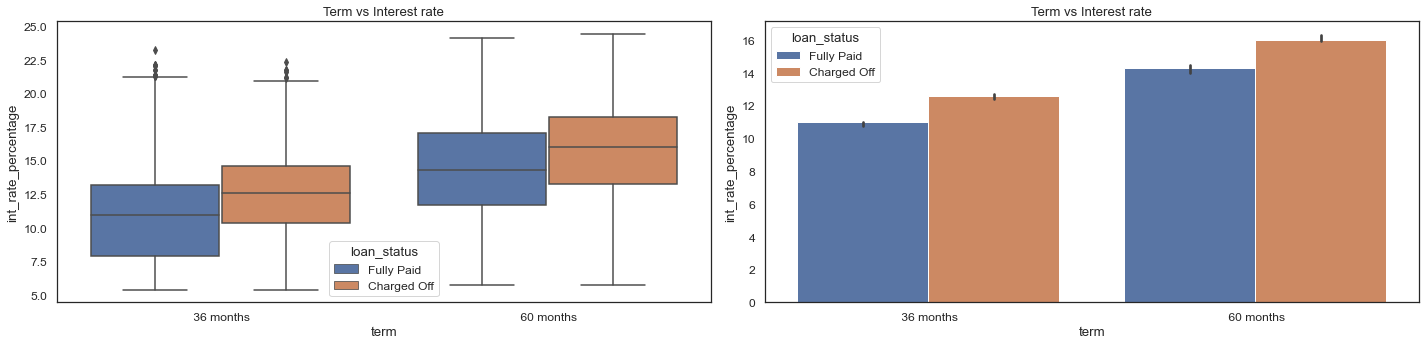

In [71]:
plt.figure(figsize=(20,5))

#Box plot for Term vs Interest rate, hue as loan status
plt.subplot(121)
sns.boxplot(x='term', y='int_rate_percentage', hue='loan_status', data=final_loan_df)
plt.title('Term vs Interest rate')

#Bar plot for Term vs Interest rate, hue as loan status
plt.subplot(122)
sns.barplot(x='term', y='int_rate_percentage', hue='loan_status', data=final_loan_df, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

#### Observations
- The interest rate for defaulters is higher for both the terms(36 and 60 months).

### Term vs DTI

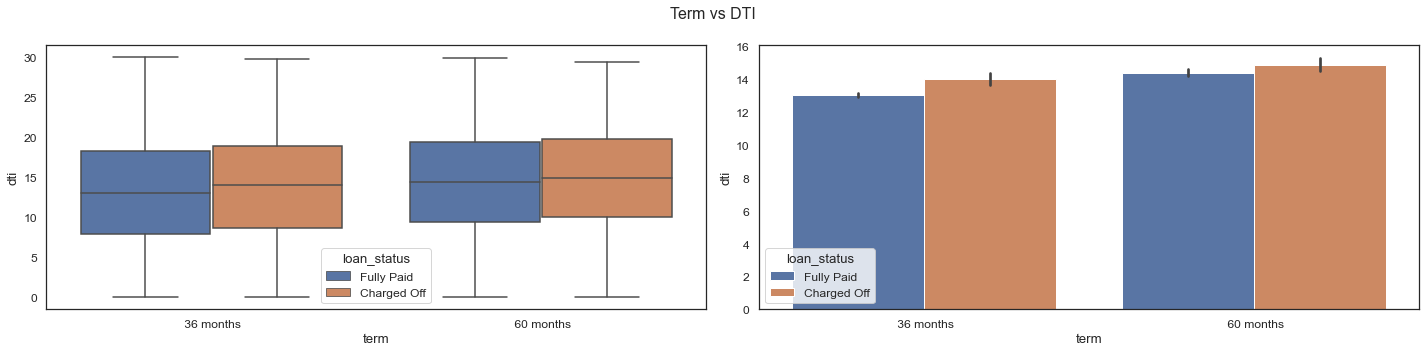

In [72]:
plt.figure(figsize=(20,5))
#Box plot for Term vs DTI, hue as loan status
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=final_loan_df)

#Bar plot for Term vs DTI, hue as loan status
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=final_loan_df, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

#### Observations:
- For Debit to income(DTI) ratio charge-off are comparitively higher when compared with fully-paid.

### Loan Purpose vs Loan amount

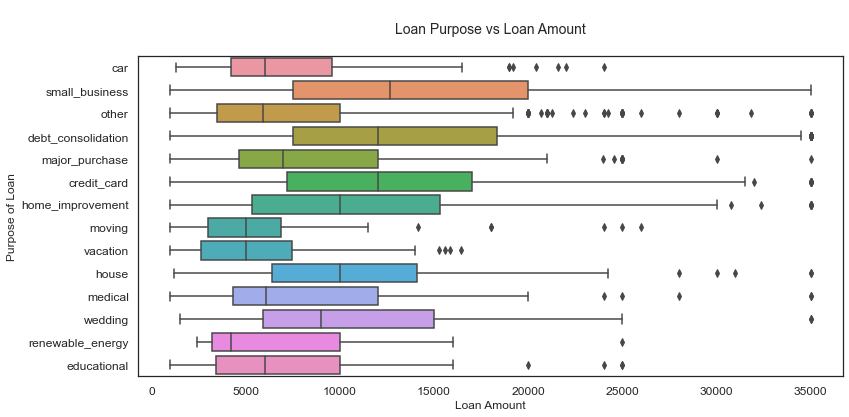

In [73]:
plt.figure(figsize=(12,6))

sns.set_style('white')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =final_loan_df[final_loan_df.loan_status == 'Charged Off'])
ax.set_title('\nLoan Purpose vs Loan Amount\n',fontsize = 14)
ax.set_ylabel('Purpose of Loan',fontsize = 12)
ax.set_xlabel('Loan Amount',fontsize = 12)
plt.show()

**Observations:**
 - Spread of Charged off loans is widest for Small Business Purpose and also it has highest median and 75th percentile value. 


### Loan Purpose vs Interest Rate

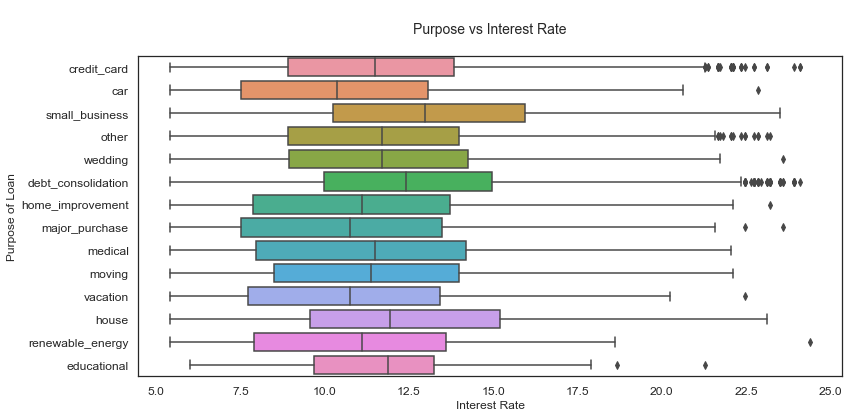

In [74]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='int_rate_percentage', y='purpose', data =final_loan_df)
ax.set_title('\nPurpose vs Interest Rate\n',fontsize=14)
ax.set_xlabel('Interest Rate',fontsize=12)
ax.set_ylabel('Purpose of Loan',fontsize=12)
plt.show()

**Observations:**
 - Loans taken for small business purpose have higher interest rates(higher median  value ), as they may be risky and so higher chances of defaulting

### Interest Rate vs Grade

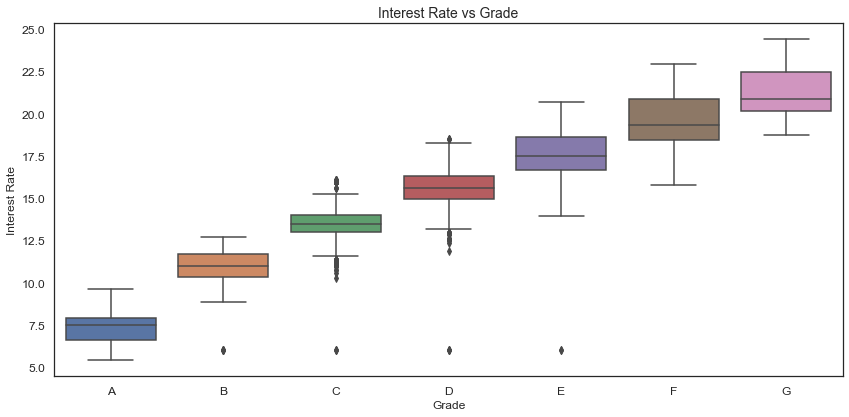

In [75]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='int_rate_percentage', x='grade', data =final_loan_df, order = 'ABCDEFG')
ax.set_title('Interest Rate vs Grade',fontsize=14)
ax.set_ylabel('Interest Rate',fontsize=12)
ax.set_xlabel('Grade',fontsize=12)
plt.show()

**Observations:**
  - Loan Interest Rate increases as we move from Grade A to G. 
  - Clearly Grade F and G are risky loans

### Numerical-Numerical Bivariate Analysis


### Loan Amount vs Annual income

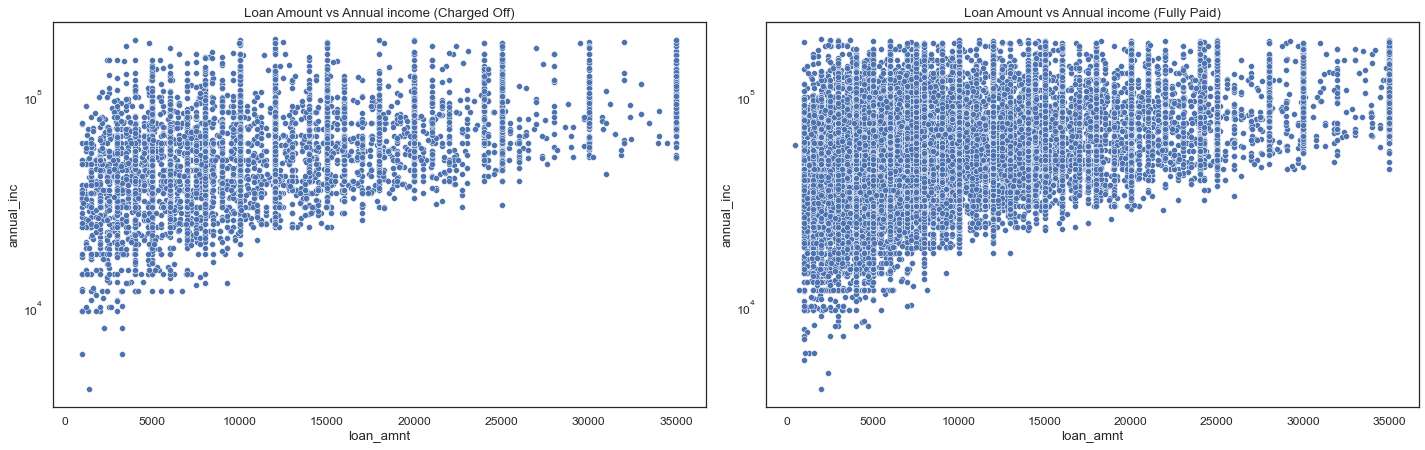

In [76]:
#Adjusting the size of figure to accomodate 2 plots
plt.figure(figsize=(20,12))

#Scatter plot for Loan Amount vs Annual income for Charged Off
plt.subplot(2,2,1)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=final_loan_df[final_loan_df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Annual income (Charged Off)')

#Scatter plot for Loan Amount vs Annual income for Fully Paid
plt.subplot(2,2,2)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=final_loan_df[final_loan_df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Annual income (Fully Paid)')
plt.show()

#### Observation:

 - As compare to Annual income, both Fully paid and Charged Off loans are having similar pattern.
 - Clearly, with higher income, the number of charged off loans are less

### Interest Rate vs DTI

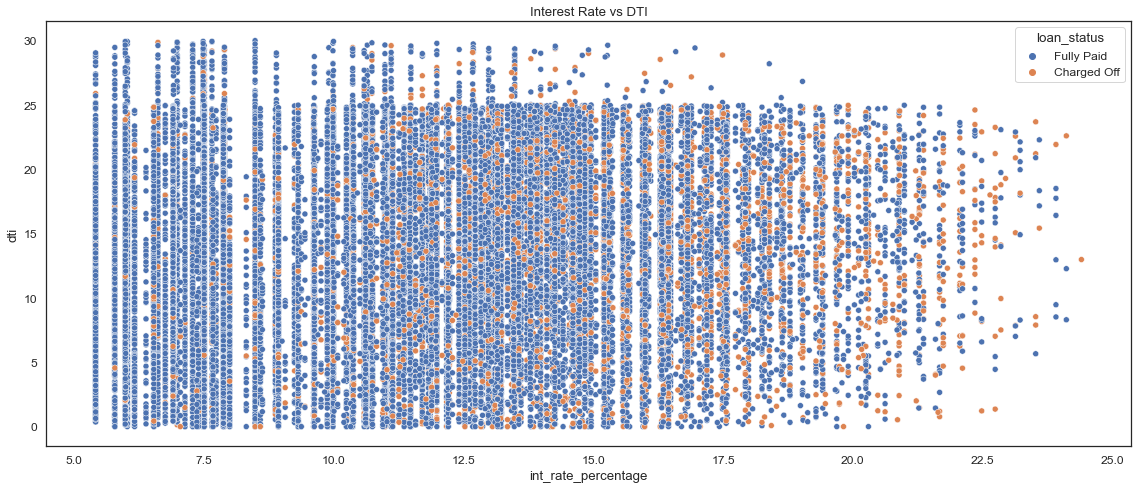

In [77]:
#Adjusting the size of figure to accomodate plot
plt.figure(figsize=(16,7))

#Scatter plot for Interest Rate vs DTI, hue as loan_status
sns.scatterplot(x='int_rate_percentage', y='dti', data=final_loan_df, hue='loan_status')
plt.title('Interest Rate vs DTI')
plt.show()

#### Observation:

 - Charged off proportion is increasing with the increase in loan interest rate
 - With lower interest rate, mostly the loans are fully paid

### Multivariate Analysis - Pair Plots¶


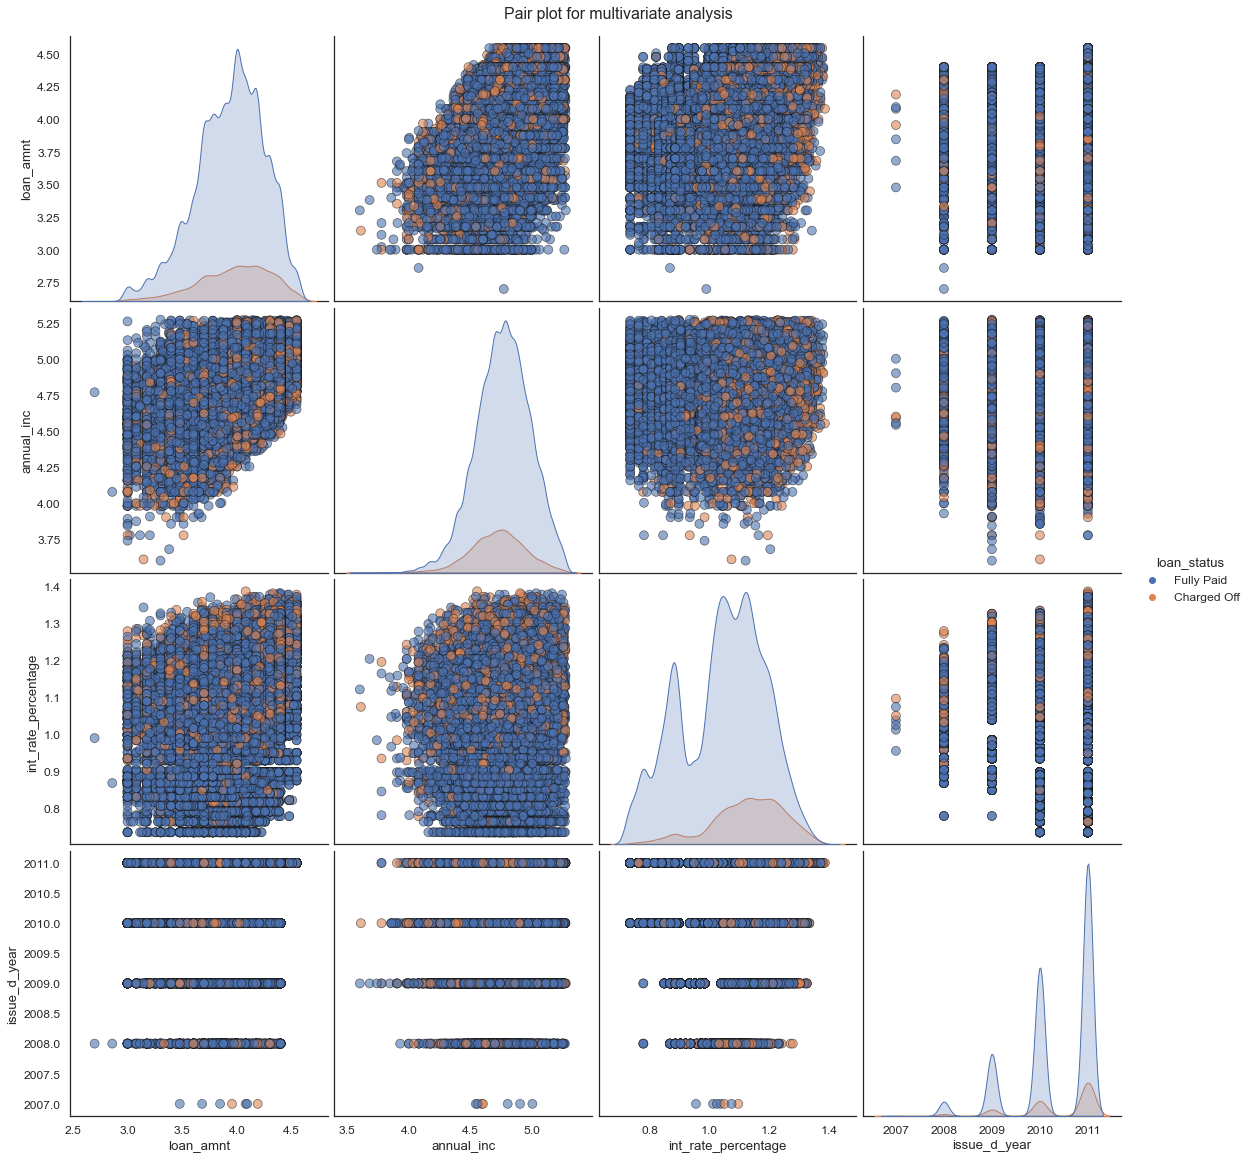

In [78]:
# Draw a pair plot for multivariate analysis
final_loan_df_pair = final_loan_df[['loan_amnt', 'annual_inc', 'int_rate_percentage','loan_status', 'issue_d_year']].copy()
# Picking few imporatnt columns from data frame.
final_loan_df_pair.head()

# Take the log of below columns as they are heavily skewed
final_loan_df_pair['loan_amnt'] = np.log10(final_loan_df_pair['loan_amnt'])
final_loan_df_pair['annual_inc'] = np.log10(final_loan_df_pair['annual_inc'])
final_loan_df_pair['int_rate_percentage'] = np.log10(final_loan_df_pair['int_rate_percentage'])

# Create a pair plot colored by loan status with a density plot...
ax = sns.pairplot(final_loan_df_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
ax.fig.suptitle("Pair plot for multivariate analysis", y=1.01) 


plt.show()

#### Observation:
- As we can observe, there is higher charged-off ratio with higher interest rates.
- The loan amount slightly goes up with higher annual income.
- There is an increase in charged-off counts with the increase in year.
- There is an increase in Interest rate as loan amount increases
